1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

nan
0.5


D:\develop\Anaconda\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
D:\develop\Anaconda\lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


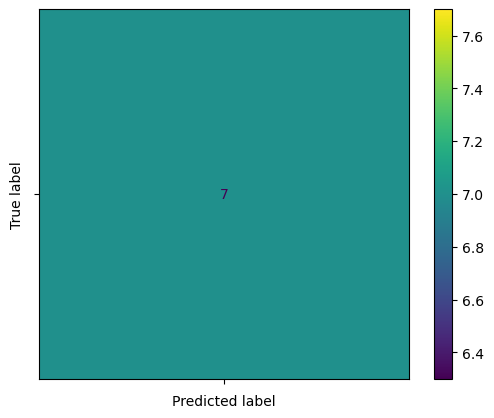

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('output4.xlsx')

data1=data[['小麦面粉平均每次食用量',  '杂粮平均每次食用量','薯类平均每次食用量', 
'油炸面食平均每次食用量',  '猪肉平均每次食用量', '牛羊肉平均每次食用量', 
'禽肉平均每次食用量', '内脏类平均每次食用量', '水产类平均每次食用量', 
'鲜奶平均每次食用量', '奶粉平均每次食用量',  '酸奶平均每次食用量', 
'豆腐平均每次食用量', '豆腐丝平均每次食用量',  '豆浆平均每次食用量', 
'干豆平均每次食用量', '新鲜蔬菜平均每次食用量',  '海草类平均每次食用量', 
'咸菜平均每次食用量',  '泡菜平均每次食用量', '酸菜平均每次食用量',
'糕点平均每次食用量',  '水果平均每次食用量', '果汁饮料平均每次食用量', 
'其他饮料平均每次食用量', '植物油', '动物油', '盐', '酱油', '醋', '酱类', 
'味精',  '食用小麦面粉的频率', '食用杂粮的频率', '食用薯类的频率', 
'食用油炸面食的频率', '食用猪肉的频率', '食用牛羊肉的频率', '食用禽肉的频率',
'食用内脏的频率', '食用水产的频率', '食用鲜奶的频率', '食用奶粉的频率',
'食用酸奶的频率', '食用蛋类的频率', '食用豆腐的频率', '食用豆腐丝等的频率', 
'食用豆浆的频率', '食用干豆的频率',  '食用海草的频率', '食用咸菜的频率', 
'食用泡菜的频率', '食用酸菜的频率', '食用糕点的频率', '食用水果的频率', 
'食用果汁饮料的频率', '食用其他饮料的频率','是否吃海草类','大米平均每次食用量',
            '蛋类平均每次食用量','水产类平均每次食用量'
]]


def dis_data(data1):
    data2 = []
    row, col = data1.shape
    for i in range(col):
        data2.append(data1[:, i])
    return data2


data_1=np.array(data1)
data2=dis_data(data_1)
data4=data2
data3=np.array(data['婚姻状况'].values)
data4.append(data3)
y=[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

x_train,x_test,y_train,y_test=train_test_split(data4,y,test_size=0.1,random_state=42)
## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42   
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels='').plot()
plt.savefig('output5.png', dpi=4000, bbox_inches='tight')  #将图片保存到磁盘


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, balanced_accuracy_score
df=classification_report(y_test, y_pred,output_dict=True)
data10=pd.DataFrame(df).transpose()
data10.to_excel('score5.xlsx')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(x_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)


from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)
print(PR_AUC)